In [13]:
import omicverse as ov
import scanpy as sc
ov.ov_plot_set()

In [5]:
import scanpy as sc

In [3]:
pwd

'/root/notebooks'

In [4]:
ll

total 30817092
-rw-r--r-- 1 root        40492 Apr 15 19:53 SM.ipynb
-rw-r--r-- 1 root         1650 Apr 16 13:51 Untitled1.ipynb
-rw-r--r-- 1 root         2570 Apr 16 17:36 clustering_space.ipynb
-rw-r--r-- 1 root   3828919618 Apr 16 17:26 filtered_250adata.h5ad
-rw-r--r-- 1 root  13245143518 Apr 15 19:55 filtered_adata.h5ad
-rw-r--r-- 1 root         7052 Apr 16 17:37 preprocess.ipynb
-rw-r--r-- 1 22954 14482560400 Apr 15 17:16 raw.cluster.h5ad
-rw-r--r-- 1 root        14258 Apr 16 17:27 raw_cluster.ipynb


In [6]:
adata_300 = sc.read_h5ad("filtered_300adata.h5ad")

In [6]:
adata_300.var_names_make_unique()

In [7]:
adata_300.obs_names_make_unique()

In [7]:
adata_300

AnnData object with n_obs × n_vars = 119708 × 1000
    obs: 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'version', 'Run_Tissue_name', 'Panel', 'slide_ID_numeric', 'cell_ID', 'unassignedTranscripts', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'sample', 'leiden'
    var: 'DisplayName', 'Barcode', 'CodeClass', 'ProbeID'
    uns: 'leiden', 'log1p', 'neighbors', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'scaled|original|X_pca', 'spatial'
    varm: 'scaled|original|pca_loadings'
    layers: 'counts', 'lognorm', 'scaled'
    obsp: 'connectivities', 'distances'

In [8]:
## 输出obs例名
colobs_list = list(adata_300.obs.columns)
print(colobs_list)

['fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'version', 'Run_Tissue_name', 'Panel', 'slide_ID_numeric', 'cell_ID', 'unassignedTranscripts', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'sample', 'leiden']


In [9]:
if 'mito_perc' in adata_300.obs.columns:
    print("Y")
else:
    print("N")

N


In [10]:
# 首先确认 mito_perc 是否存在于 adata.obs 中
if 'mito_perc' in adata_300.obs.columns:
    # 若存在，则打印 mito_perc 的值
    print(adata.obs['mito_perc'])
else:
    print("mito_perc 不在 adata.obs 中，请确认数据集是否包含此信息。")

mito_perc 不在 adata.obs 中，请确认数据集是否包含此信息。


In [ ]:


#  预处理

In [24]:
 ##  第一步：质控
adata_300_qc=ov.pp.qc(adata_300,
              tresh={'mito_perc': 0.05, 'nUMIs': 100, 'detected_genes': 150})


Calculate QC metrics
End calculation of QC metrics.
Original cell number: 31625
Begin of post doublets removal and QC plot
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.74
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 13.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.2%
    Scrublet finished (0:00:50)
Cells retained after scrublet: 31615, 10 removed.
End of post doublets removal and QC plots.
Filters application (seurat or mads)
Lower treshold, nUMIs: 100; filtered-out-cells: 0
Lower treshold, n genes

In [17]:
""" 
    解释：mito_perc是指基因表达比例超过5%时，该细胞可能会被标记为低质量细胞并被移除
          nUMIs:低于500个UMIs的细胞可能信号较弱，因此也可能被移除
         detected_genes:于250个基因表达的细胞可能由于测序深度不足等原因，被认为数据质量较差而被移除

"""

' \n    解释：mito_perc是指基因表达比例超过5%时，该细胞可能会被标记为低质量细胞并被移除\n          nUMIs:低于500个UMIs的细胞可能信号较弱，因此也可能被移除\n         detected_genes:于250个基因表达的细胞可能由于测序深度不足等原因，被认为数据质量较差而被移除\n\n'

In [25]:
adata_300_qc

AnnData object with n_obs × n_vars = 31615 × 1000
    obs: 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'version', 'Run_Tissue_name', 'Panel', 'slide_ID_numeric', 'cell_ID', 'unassignedTranscripts', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'sample', 'leiden', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'DisplayName', 'Barcode', 'CodeClass', 'ProbeID', 'mt', 'n_cells'
    uns: 'leiden', 'log1p', 'neighbors', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap', 'scrublet'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'scaled|original|X_pca', 'spatial

In [40]:
"""
if "nCount_RNA" in adata_300.obs.columns:
   filter_300adata_s = adata_300[adata_300.obs["nCount_RNA"] >= 400]
else:
    print("没有")
"""

'\nif "nCount_RNA" in adata_300.obs.columns:\n   filter_300adata_s = adata_300[adata_300.obs["nCount_RNA"] >= 400]\nelse:\n    print("没有")\n'

In [41]:
"""
temp = list(adata_300.obs.columns)
print(temp)
"""

'\ntemp = list(adata_300.obs.columns)\nprint(temp)\n'

In [50]:
## 第二步：gene detection
# (1) 将原始counts储存到unils下
temp = ov.utils.store_layers(adata_300_qc,layers="counts")

......The X of adata have been stored in counts


In [ ]:
"""
解释：将 adata 中名为 'counts' 的原始计数数据存储到 adata.uns 的一个特定键 'layers_counts' 下，名字也是"counts"
""


In [72]:
# (2) 标准化或者HVGs
adata_300 = ov.pp.preprocess(adata_300_qc, mode='shiftlog|pearson',n_HVGs=2000,)
## 先使用shiftlog归一化，然后用person进行HVGs，选择数目为2000个

Begin robust gene identification
After filtration, 1000/1000 genes are kept. Among 1000 genes, 1000 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
End of size normalization: shiftlog and HVGs selection pearson


In [74]:
ov.pp.pca(adata_300,layer='scaled',n_pcs=10)

KeyError: 'CST3'

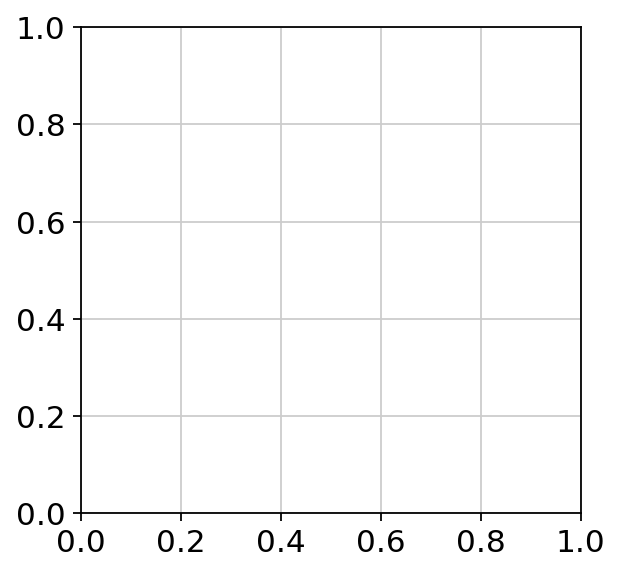

In [79]:
adata_300.obsm['X_pca']=adata_300.obsm['scaled|original|X_pca']
ov.utils.embedding(adata_300,
                  basis='X_pca',
                    color='CST3',
                  frameon='small')
# 将['scaled|original|X_pca']里面的矩阵复制到更标准的位置，即adata.obsm['X_pca']
# obsm是"observation by matrix"的缩写，用于存储每个观测（在这里是单个细胞）在特定降维空间中的坐标。